In [2]:
!%pip install zipcodes 
# installing Zipcodes library .

'%pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
### IMPORT: ------------------------------------
import scipy.stats as stats 
import pandas as pd
import numpy as np
import zipcodes as zcode # to get zipcodes

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

import statsmodels.api as sm
#--Sklearn library--
# Sklearn package's randomized data splitting function
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
#AUC ROC curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn import tree

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay #to plot confusion matric
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
# To supress numerical display in scientific notations
warnings.filterwarnings('ignore') # To supress warnings
 # set the background for the graphs
plt.style.use('ggplot')

In [4]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [5]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv') 
raw_data = pd.read_csv('Bank_Personal_Loan_Modelling.csv') 

In [6]:
# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


**PRE-PROCESSING PHASE**

In [7]:
#get the size of dataframe
print ("Rows     : " , raw_data.shape[0])  #get number of rows/observations
print ("Columns  : " , raw_data.shape[1]) #get number of columns
print ("#"*40,"\n","Features : \n\n", raw_data.columns.tolist()) #get name of columns/features
print ("#"*40,"\nMissing values :\n\n", raw_data.isnull().sum().sort_values(ascending=False))
print( "#"*40,"\nPercent of missing :\n\n", round(raw_data.isna().sum() / raw_data.isna().count() * 100, 2)) # looking at columns with most Missing Values
print ("#"*40,"\nUnique values :  \n\n", raw_data.nunique())  #  count of unique values

Rows     :  5000
Columns  :  14
######################################## 
 Features : 

 ['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
######################################## 
Missing values :

 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
######################################## 
Percent of missing :

 ID                   0.00000
Age                  0.00000
Experience           0.00000
Income               0.00000
ZIP Code             0.00000
Family               0.00000
CCAvg                0.00000
Education            0.00000
Mortgage             0.00000
Pers

In [8]:
#checking data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


There are no missing values, no null values in the dataset. 
All the columns are numerical here.
From the data sheet we got: 
I. Nominal variables:
1.ID
2.Zip Code

II. Ordinal Categorical Variables:
1.Family - Family size of the customer
2.Education - education level of the customer

III. Independent variables:
1.Age:Age of the customer 2.Experience:Years of experience of the customer 3.Income:Annual income in dollars 4.CCAvg:Average credit card spending 5.Mortage:Value of House Mortgage

IV. Binary category variables:
1.Personal Loan:Did this customer accept the personal loan offered in the last campaign? 
2.Securities Account:Does the customer have a securities account with the bank? 
3.CD Account:Does the customer have a certificate of deposit (CD) account with the bank? 
4.Online:Does the customer use internet banking facilities? 5.Credit Card:Does the customer use a credit card issued by UniversalBank?

**Target variable is :Personal Loan**

#Zipcode,Family,Education,Securities Account,CD_account,online,Credit card are all categorical variables.

In [9]:
#ID is no needed, we can drop it
raw_data.drop(['ID'],axis=1,inplace=True) 

In [10]:
raw_data.rename(columns={"ZIP Code":"ZIPCode","Personal Loan":"PersonalLoan","Securities Account":"SecuritiesAccount","CD Account":'CDAccount'},inplace=True)

ZIPCODE is enumerated in a multi-data type. For the sake of convenience, I will process the zipcode into a region/domain name and group it into groups with common characteristics.

In [11]:
#xulyzipcode
raw_data.ZIPCode.nunique()

467

In [12]:
# get unique zipcodes
list_zipcode=raw_data.ZIPCode.unique()

In [13]:
dict_zip={}
for zipcode in list_zipcode:
    my_city_county = zcode.matching(zipcode.astype('str'))
    if len(my_city_county)==1: # if  zipcode is present then get county else, assign zipcode to county
        county=my_city_county[0].get('county')
    else:
        county=zipcode
    
    dict_zip.update({zipcode:county})

In [14]:
dict_zip

{91107: 'Los Angeles County',
 90089: 'Los Angeles County',
 94720: 'Alameda County',
 94112: 'San Francisco County',
 91330: 'Los Angeles County',
 92121: 'San Diego County',
 91711: 'Los Angeles County',
 93943: 'Monterey County',
 93023: 'Ventura County',
 94710: 'Alameda County',
 90277: 'Los Angeles County',
 93106: 'Santa Barbara County',
 94920: 'Marin County',
 91741: 'Los Angeles County',
 95054: 'Santa Clara County',
 95010: 'Santa Cruz County',
 94305: 'Santa Clara County',
 91604: 'Los Angeles County',
 94015: 'San Mateo County',
 90095: 'Los Angeles County',
 91320: 'Ventura County',
 95521: 'Humboldt County',
 95064: 'Santa Cruz County',
 90064: 'Los Angeles County',
 94539: 'Alameda County',
 94104: 'San Francisco County',
 94117: 'San Francisco County',
 94801: 'Contra Costa County',
 94035: 'Santa Clara County',
 92647: 'Orange County',
 95814: 'Sacramento County',
 94114: 'San Francisco County',
 94115: 'San Francisco County',
 92672: 'Orange County',
 94122: 'San Fra

There is some missing data, need to search google and add to the data.

In [15]:
#adding and update data zipcode
dict_zip.update({92717:'Orange County'})
dict_zip.update({92634:'Orange County'})
dict_zip.update({9307:'Sampson County'})
dict_zip.update({96551:'Bay Area'})

In [16]:
raw_data['County']=raw_data['ZIPCode'].map(dict_zip)

In [17]:
raw_data.County.nunique()

40

CHECKING DATA TYPE

In [18]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Experience         5000 non-null   int64  
 2   Income             5000 non-null   int64  
 3   ZIPCode            5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   CCAvg              5000 non-null   float64
 6   Education          5000 non-null   int64  
 7   Mortgage           5000 non-null   int64  
 8   PersonalLoan       5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  County             5000 non-null   object 
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


In [19]:
#fix data type to reduce the dataspace required
# converting categorical varaible to category type
category_col = ['PersonalLoan', 'SecuritiesAccount','Family', 'CDAccount', 'Online', 'CreditCard', 'ZIPCode', 'Education','County']
raw_data[category_col] = raw_data[category_col].astype('category')

In [20]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   ZIPCode            5000 non-null   category
 4   Family             5000 non-null   category
 5   CCAvg              5000 non-null   float64 
 6   Education          5000 non-null   category
 7   Mortgage           5000 non-null   int64   
 8   PersonalLoan       5000 non-null   category
 9   SecuritiesAccount  5000 non-null   category
 10  CDAccount          5000 non-null   category
 11  Online             5000 non-null   category
 12  CreditCard         5000 non-null   category
 13  County             5000 non-null   category
dtypes: category(9), float64(1), int64(4)
memory usage: 266.4 KB


**Processing Experience**

In [21]:
# checking negative and zero values for experience. 
raw_data[raw_data['Experience']<0]['Age'].describe()

count   52.00000
mean    24.51923
std      1.47516
min     23.00000
25%     24.00000
50%     24.00000
75%     25.00000
max     29.00000
Name: Age, dtype: float64

between the ages of 23 and 29 with experience data < 0. Need to replace negative values to absolute values.

In [22]:
raw_data[raw_data['Experience']<0].sort_values(by='Experience',ascending=True)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,County
4514,24,-3,41,91768,4,1.00000,3,0,0,0,0,1,0,Los Angeles County
2618,23,-3,55,92704,3,2.40000,2,145,0,0,0,1,0,Orange County
4285,23,-3,149,93555,2,7.20000,1,0,0,0,0,1,0,Kern County
3626,24,-3,28,90089,4,1.00000,3,0,0,0,0,0,0,Los Angeles County
2717,23,-2,45,95422,4,0.60000,2,0,0,0,0,1,1,Lake County
2876,24,-2,80,91107,2,1.60000,3,238,0,0,0,0,0,Los Angeles County
3130,23,-2,82,92152,2,1.80000,2,0,0,1,0,0,1,San Diego County
2466,24,-2,80,94105,2,1.60000,3,0,0,0,0,1,0,San Francisco County
3796,24,-2,50,94920,3,2.40000,2,0,0,1,0,0,0,Marin County
2962,23,-2,81,91711,2,1.80000,2,0,0,0,0,0,0,Los Angeles County


In [23]:
raw_data.groupby(['Age','Education'])['Experience'].describe().T

Age             23                24                         25           \
Education        1        2        1        2        3        1        2   
count      7.00000  5.00000 13.00000  8.00000  7.00000 23.00000 11.00000   
mean      -1.28571 -2.20000 -0.69231 -0.87500 -2.00000  0.52174 -0.27273   
std        0.75593  0.44721  0.94733  0.64087  1.00000  0.79026  0.64667   
min       -3.00000 -3.00000 -2.00000 -2.00000 -3.00000 -1.00000 -1.00000   
25%       -1.00000 -2.00000 -2.00000 -1.00000 -2.50000  0.00000 -1.00000   
50%       -1.00000 -2.00000  0.00000 -1.00000 -2.00000  1.00000  0.00000   
75%       -1.00000 -2.00000  0.00000 -0.75000 -2.00000  1.00000  0.00000   
max       -1.00000 -2.00000  0.00000  0.00000  0.00000  1.00000  1.00000   

Age                      26           ...       64       65                    \
Education        3        1        2  ...        3        1        2        3   
count     19.00000 30.00000 24.00000  ... 30.00000 30.00000 23.00000 27.00000   
mean      -0.52632  1.43333  0.75000  ... 38.53333 39.86667 40.08696 39.51852   
std        0.69669  0.81720  0.84699  ...  1.75643  0.73030  0.73318  1.55342   
min       -2.00000  0.00000 -1.00000  ... 34.00000 39.00000 39.00000 35.00000   
25%       -1.00000  1.00000  0.00000  ... 38.00000 39.00000 40.00000 39.00000   
50%       -1.00000  2.00000  1.00000  ... 39.00000 40.00000 40.00000 40.00000   
75%        0.00000  2.00000  1.00000  ... 40.00000 40.00000 41.00000 41.00000   
max        1.00000  2.00000  2.00000  ... 40.00000 41.00000 41.00000 41.00000   

Age             66                         67                    
Education        1        2        3        1        2        3  
count      9.00000  5.00000 10.00000  5.00000  3.00000  4.00000  
mean      41.11111 41.40000 40.40000 41.60000 42.66667 41.50000  
std        0.33333  0.54772  1.64655  0.89443  0.57735  0.57735  
min       41.00000 41.00000 36.00000 41.00000 42.00000 41.00000  
25%       41.00000 41.00000 40.25000 41.00000 42.50000 41.00000  
50%       41.00000 41.00000 41.00000 41.00000 43.00000 41.50000  
75%       41.00000 42.00000 41.00000 42.00000 43.00000 42.00000  
max       42.00000 42.00000 42.00000 43.00000 43.00000 42.00000  

[8 rows x 134 columns]

In [24]:
raw_data.loc[raw_data['Experience']<0,'Experience']=np.abs(raw_data['Experience'])

In [25]:
raw_data[raw_data['Experience']==0]['Age'].describe()

count   66.00000
mean    25.63636
std      1.14538
min     24.00000
25%     25.00000
50%     26.00000
75%     26.00000
max     30.00000
Name: Age, dtype: float64

In [26]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.13460,11.41519,0.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000


**Exploratory Data Analysis**

In [27]:
#EDA
for column in category_col:
    print(raw_data[column].value_counts())
    print("#" * 40)

0    4520
1     480
Name: PersonalLoan, dtype: int64
########################################
0    4478
1     522
Name: SecuritiesAccount, dtype: int64
########################################
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
########################################
0    4698
1     302
Name: CDAccount, dtype: int64
########################################
1    2984
0    2016
Name: Online, dtype: int64
########################################
0    3530
1    1470
Name: CreditCard, dtype: int64
########################################
94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94087      1
90813      1
94404      1
90068      1
9307       1
Name: ZIPCode, Length: 467, dtype: int64
########################################
1    2096
3    1501
2    1403
Name: Education, dtype: int64
########################################
Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda C

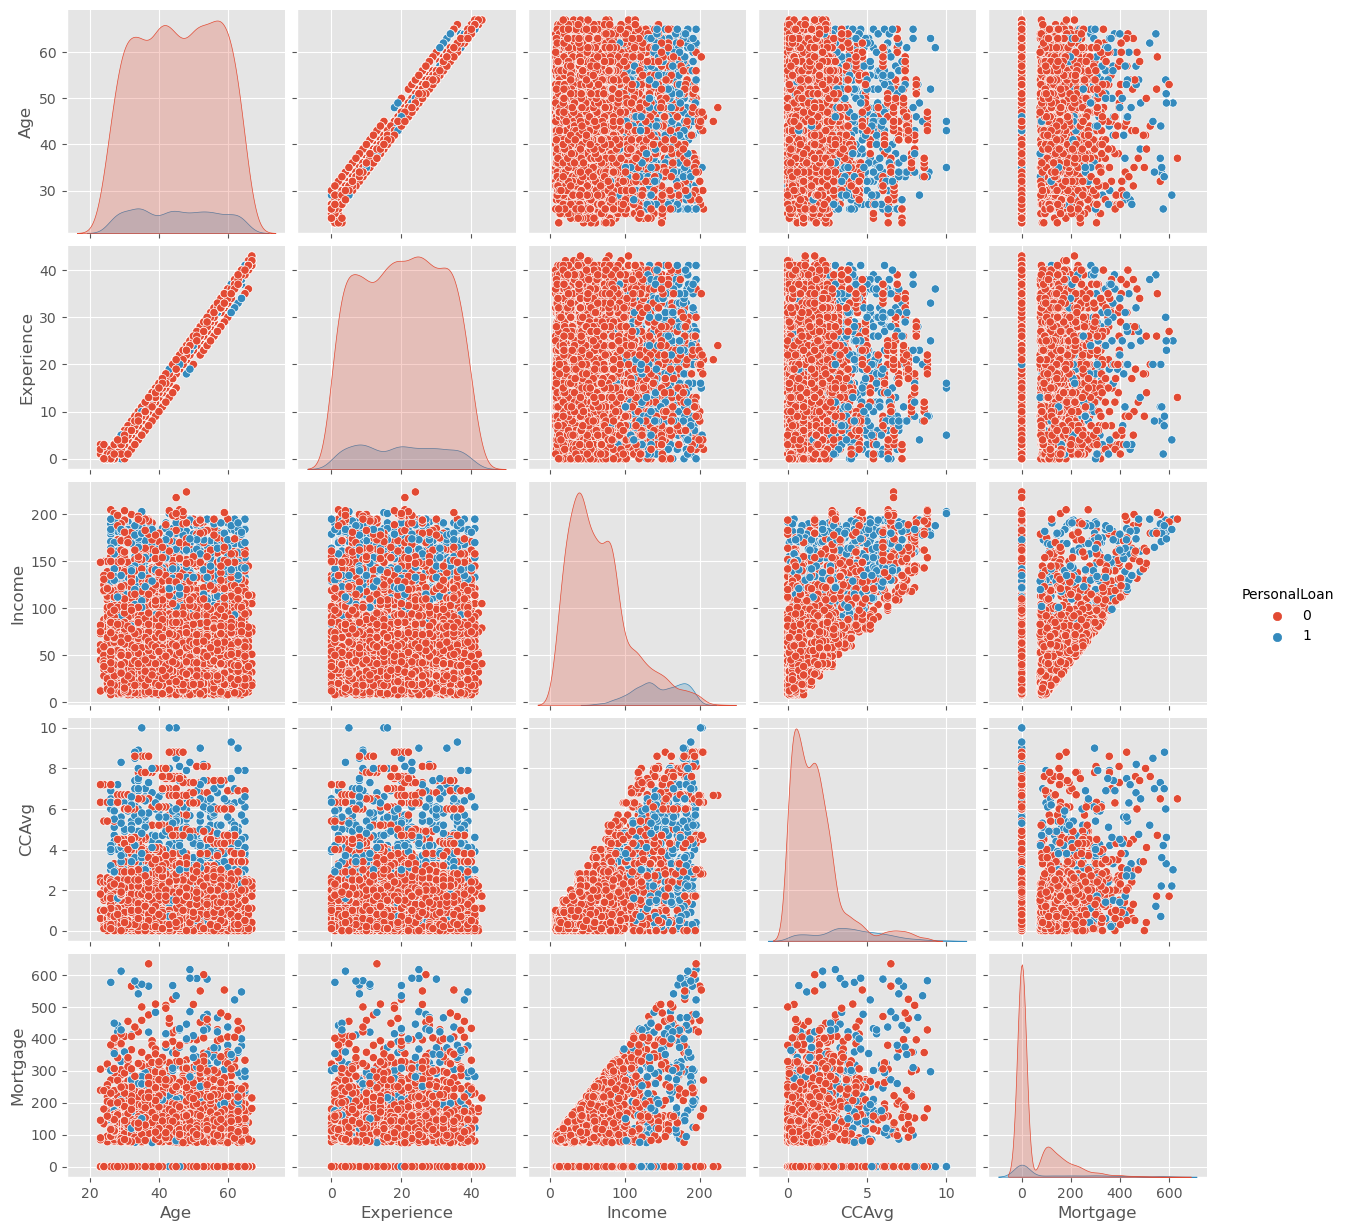

In [28]:
raw_data2 = raw_data[['Age', 'Experience', 'Income', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard', 'County']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data2, hue = 'PersonalLoan', diag_kws={'bw': 0.2})

Observations

Customers age is in range of 23 - 67, with mean and median of ~45. 
Maximum experience is 43 years. where as mean and median are ~20. 
Income are in range 8k to 224k USD. Mean is 73k USD and median is 64k USD. 224 Max salary need to be verified Maximum mortgage taken is 635k USD.Need to verify this Average spending on credit card per month ranges from 1- 10k with mean of 1.9kUSD and median of 1.5k USD 1095 customers are from Los Angeles County. 480 customers had borrowed loan before.
ghi chú thêm, nhận xét thêm

**Age**
Age can be a vital factor in borrowinng loan, converting ages to bin to explore if there is any pattern

In [29]:
raw_data['Agebin'] = pd.cut(raw_data['Age'], bins = [0, 30, 40, 50, 60, 100], labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])

**Income**
To understand customers segments derving new columns which will help us identify if customer belongs to Upper , middle or lower income group

In [30]:
# Create a new variable - Income group

raw_data["Income_group"] = pd.cut(
    x=df["Income"],
    bins=[0, 50, 140, 224],
    labels=["Lower", "Middle", "High"],
)

**Spending**
To understand customers spending derving new columns which will say if customer belongs to Upper , middle or lower spending

In [31]:
raw_data["Spending_group"] = pd.cut( x=raw_data["CCAvg"], bins=[0.00000, 0.70000, 2.50000, 10.00000],
    labels=["Low", "Medium", "High"],include_lowest=True ,
)

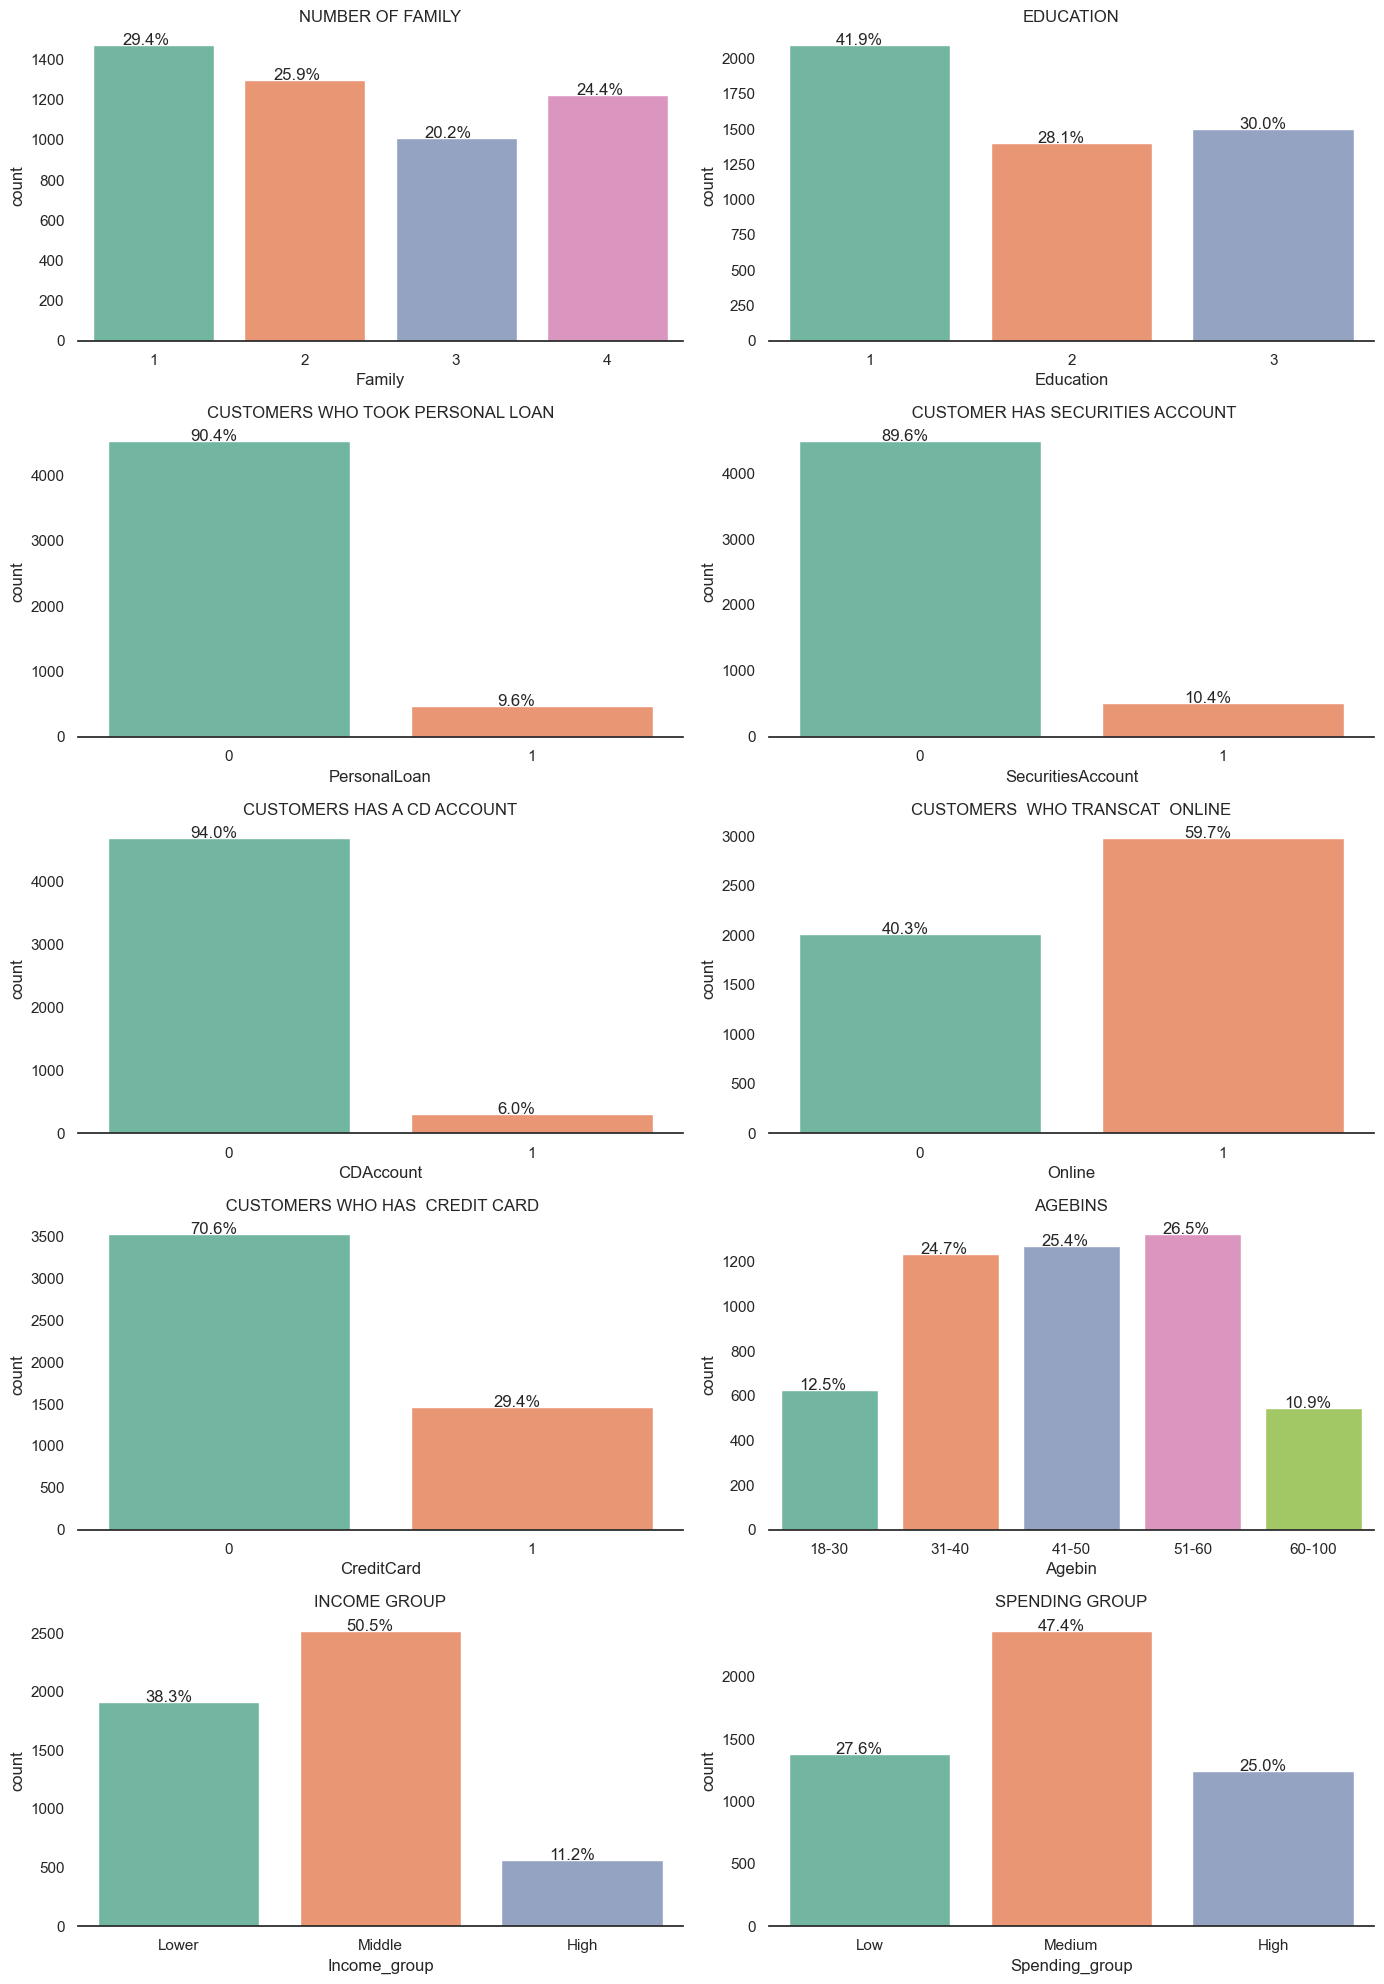

In [32]:
# Making a list of all categorical variables
cat_columns = ['Family','Education','PersonalLoan','SecuritiesAccount',
               'CDAccount','Online','CreditCard','Agebin','Income_group','Spending_group']
title=['Number of Family','Education','Customers who took Personal Loan',
       ' Customer has Securities Account','Customers has a CD Account',
       'Customers  who transcat  Online',' Customers who has  Credit Card','Agebins',"Income group",'Spending group']
plt.figure(figsize=(14,20))

sns.set_theme(style="white") # just trying to make visualisation better. This will set background to white
#list_palette=['Blues_r','Greens_r','Purples_r','Reds_r','Blues_r','Greens_r','Purples_r','Reds_r','Blues_r']
for i, variable in enumerate(cat_columns):
                     plt.subplot(5,2,i+1)
                     order = raw_data[variable].value_counts(ascending=False).index   
                     #sns.set_palette(list_palette[i]) # to set the palette
                     sns.set_palette('Set2')
                     ax=sns.countplot(x=raw_data[variable], data=raw_data)
                     sns.despine(top=True,right=True,left=True) # to remove side line from graph
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(raw_data[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.tight_layout()
                     plt.title(title[i].upper())
                                     


Observations

~29.4 % customers are single.
~41.9% customers are undergrad.
~9.6% bought a personal loan from the bank.
10.4 % customers have a securities account with the bank
6 % customer have a CD account.
60% customers transact online.
29.4% customers have credit cards.
~ 75 % of customers are in range of 31- 60.
~ 50 % Most of bank customers belong to middle income group.
~48 % of customers has medium Average spending

**Personal Loan in County**

In [33]:
raw_data.groupby(['County','PersonalLoan'])['PersonalLoan'].agg({'size'}).unstack()

size     
PersonalLoan              0    1
County                          
96651                     6    0
Alameda County          456   44
Butte County             17    2
Contra Costa County      73   12
El Dorado County         16    1
Fresno County            24    2
Humboldt County          30    2
Imperial County           3    0
Kern County              47    7
Lake County               4    0
Los Angeles County      984  111
Marin County             48    6
Mendocino County          7    1
Merced County             4    0
Monterey County         113   15
Napa County               3    0
Orange County           333   33
Placer County            22    2
Riverside County         50    6
Sacramento County       169   15
Sampson County            1    0
San Benito County        14    0
San Bernardino County    98    3
San Diego County        509   59
San Francisco County    238   19
San Joaquin County       12    1
San Luis Obispo County   28    5
San Mateo County        192   12
Santa Barbara County    143   11
Santa Clara County      492   71
Santa Cruz County        60    8
Shasta County            15    3
Siskiyou County           7    0
Solano County            30    3
Sonoma County            22    6
Stanislaus County        14    1
Trinity County            4    0
Tuolumne County           7    0
Ventura County          103   11
Yolo County             122    8

<AxesSubplot:ylabel='County'>

<Figure size 1500x2400 with 0 Axes>

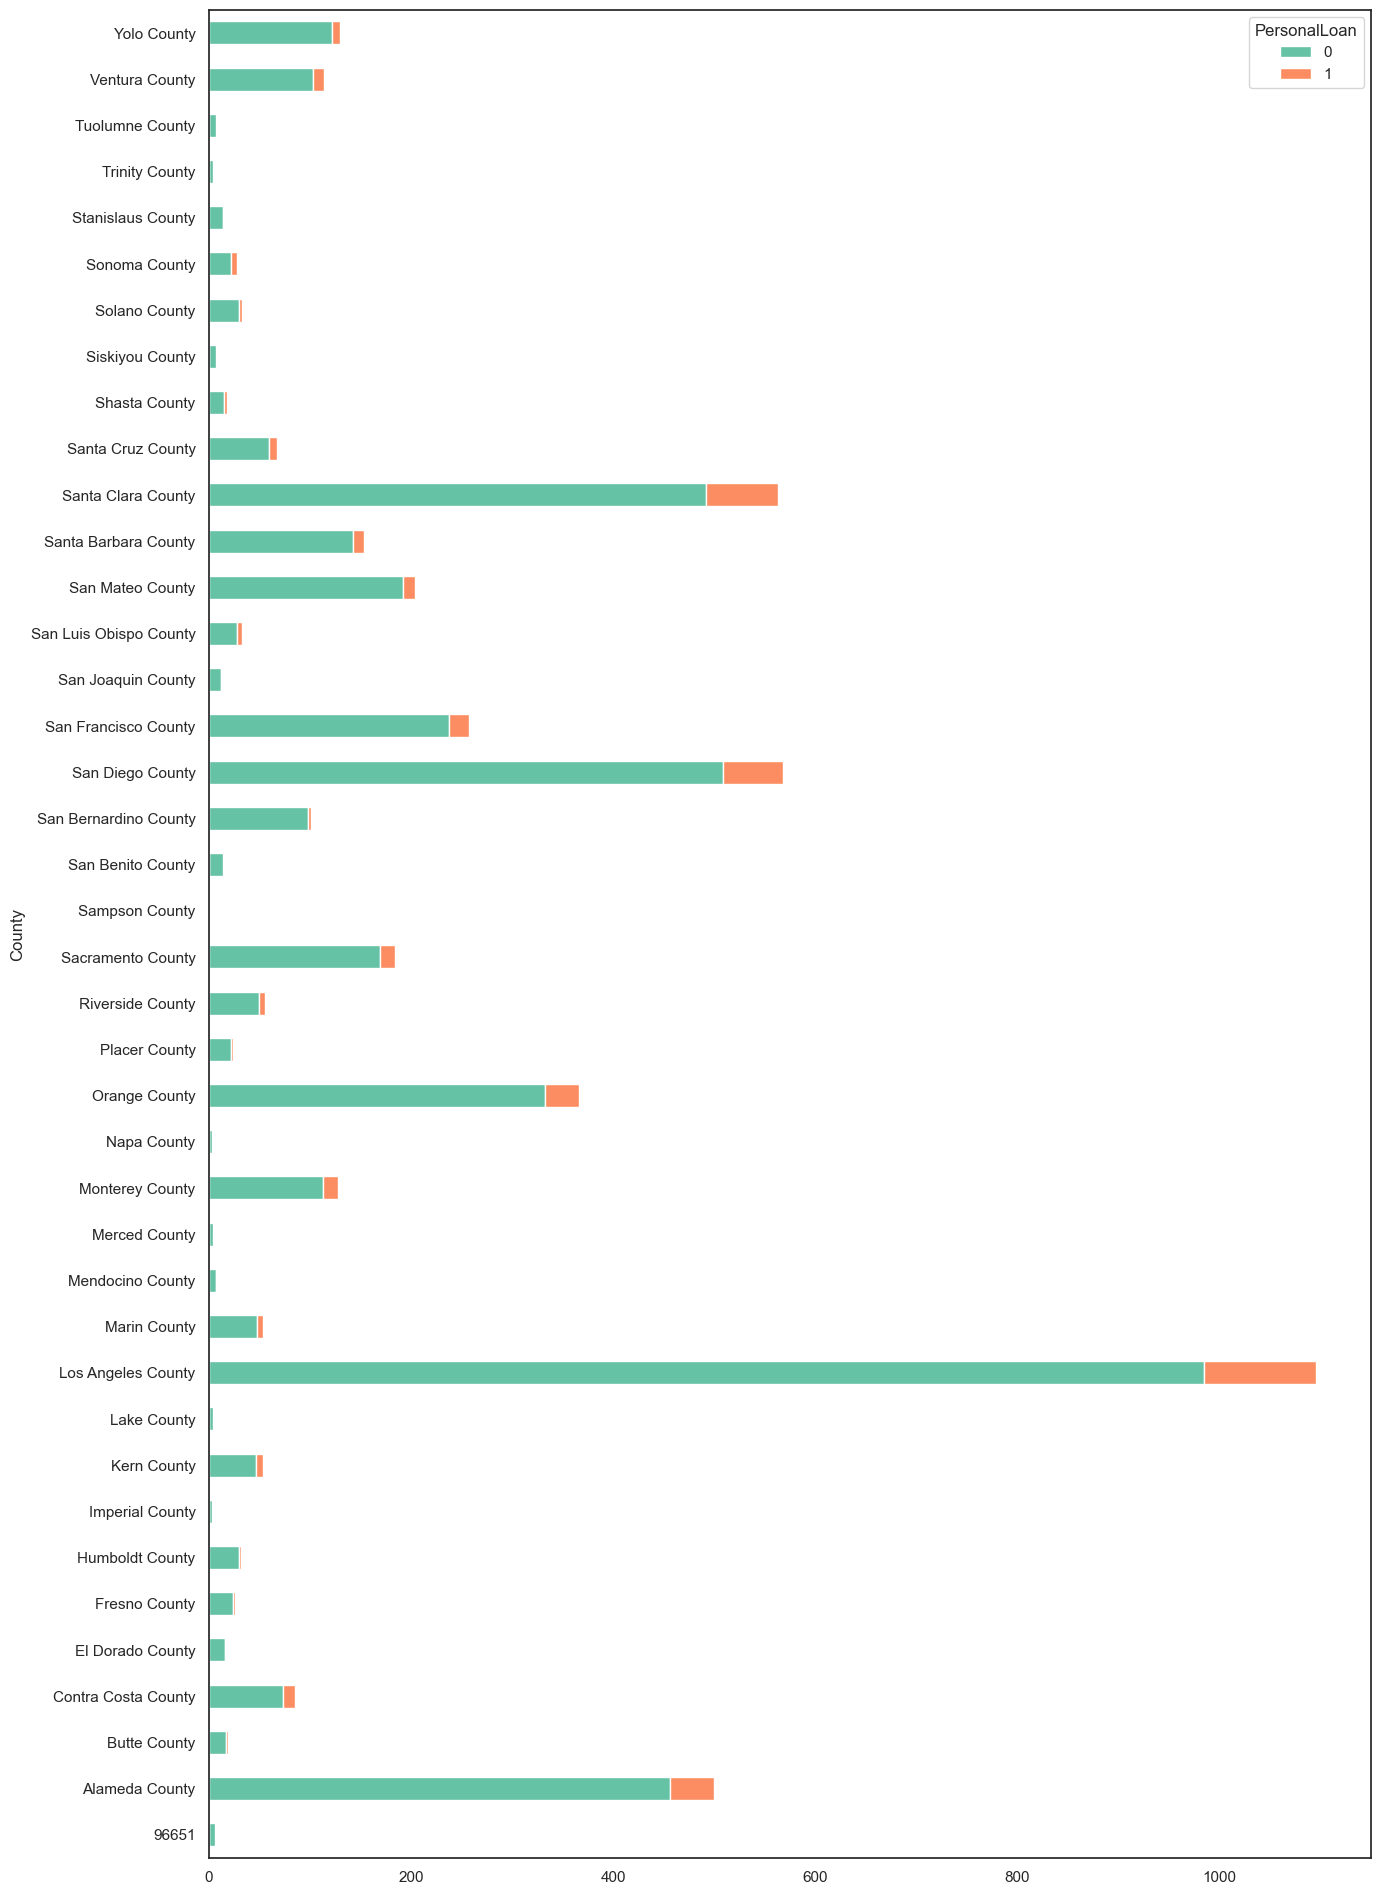

In [34]:
plt.figure(figsize=(15,24))

pd.crosstab(index=raw_data2['County'],columns=raw_data2['PersonalLoan'].sort_values(ascending=False)).plot(kind='barh',stacked=True,figsize=(15,24))

In [35]:
counties = {
'Los Angeles County':'Los Angeles Region',
'San Diego County':'Southern',
'Santa Clara County':'Bay Area',
'Alameda County':'Bay Area',
'Orange County':'Southern',
'San Francisco County':'Bay Area',
'San Mateo County':'Bay Area',
'Sacramento County':'Central',
'Santa Barbara County':'Southern',
'Yolo County':'Central',
'Monterey County':'Bay Area',            
'Ventura County':'Southern',             
'San Bernardino County':'Southern',       
'Contra Costa County':'Bay Area',        
'Santa Cruz County':'Bay Area',           
'Riverside County':'Southern',            
'Kern County':'Southern',                 
'Marin County':'Bay Area',                
'San Luis Obispo County':'Southern',     
'Solano County':'Bay Area',              
'Humboldt County':'Superior',            
'Sonoma County':'Bay Area',                
'Fresno County':'Central',               
'Placer County':'Central',                
'Butte County':'Superior',               
'Shasta County':'Superior',                
'El Dorado County':'Central',             
'Stanislaus County':'Central',            
'San Benito County':'Bay Area',          
'San Joaquin County':'Central',           
'Mendocino County':'Superior',             
'Tuolumne County':'Central',                
'Siskiyou County':'Superior',              
'Trinity County':'Superior',                
'Merced County':'Central',                  
'Lake County':'Superior',                 
'Napa County':'Bay Area',                   
'Imperial County':'Southern',
93077:'Southern',
96651:'Bay Area'
}

**Zoning for county by Region**

In [36]:
raw_data['Regions'] = raw_data['County'].map(counties)

In [37]:
raw_data['Regions'].unique()

array(['Los Angeles Region', 'Bay Area', 'Southern', 'Superior',
       'Central', nan], dtype=object)

Converting the county to regions based on https://www.calbhbc.org/region-map-and-listing.html

In [38]:
raw_data.isnull().sum()

Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
County               0
Agebin               0
Income_group         0
Spending_group       0
Regions              1
dtype: int64

In [39]:
#drop null valuas
raw_data.dropna(inplace=True)

In [40]:
#Calculate the correlation matrix
cor=raw_data2.corr()
cor

,Age,Experience,Income,CCAvg,Mortgage
Age,1.00000,0.99399,-0.05527,-0.05201,-0.01254
Experience,0.99399,1.00000,-0.04688,-0.04974,-0.01110
Income,-0.05527,-0.04688,1.00000,0.64598,0.20681
CCAvg,-0.05201,-0.04974,0.64598,1.00000,0.10990
Mortgage,-0.01254,-0.01110,0.20681,0.10990,1.00000


<AxesSubplot:>

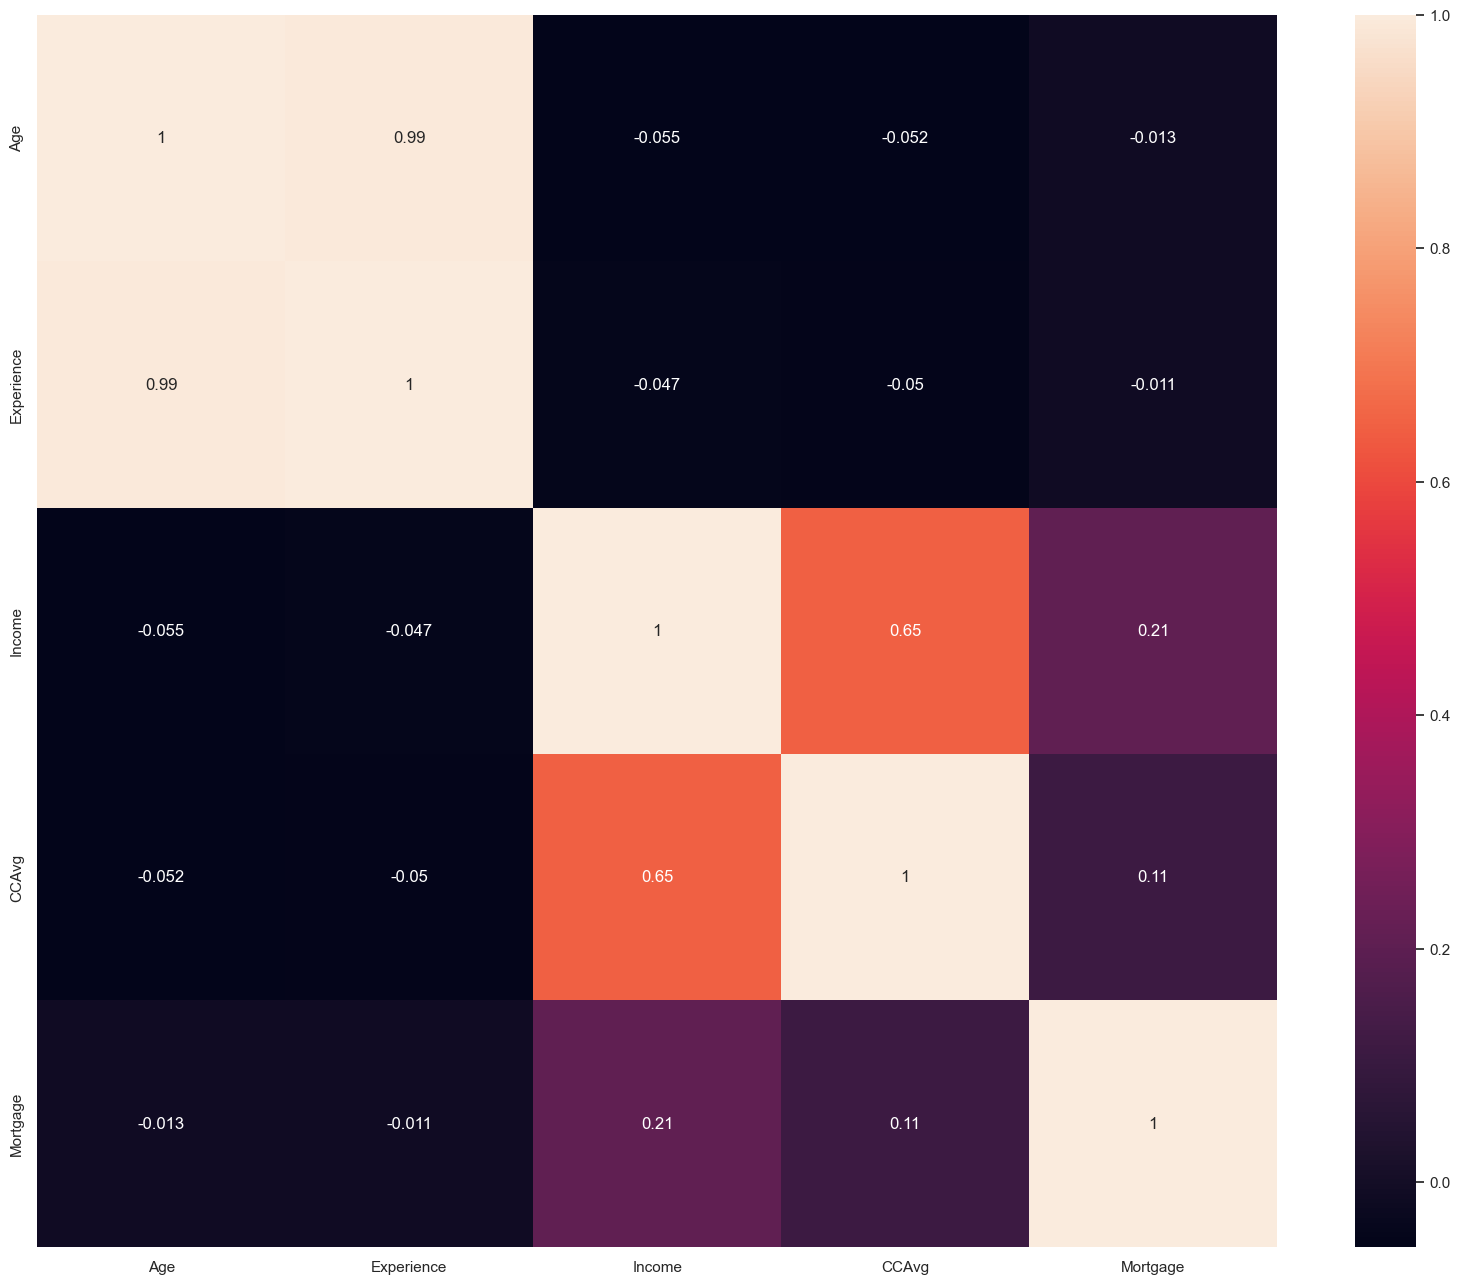

In [41]:
plt.subplots(figsize=(20,16))
sns.heatmap(cor,annot=True)

Observations

As expected Age and experience are highly correlated and one of them can be dropped.Since we had to handle 0, will drop experience.
Income and Average spending on credit card are positively corrleated.
Mortgage has very little correlation with income

**Insights based on EDA**
Summary of EDA
Data Description:

Dependent variable is the Personal_loan which is of categorical data type.
Age, Experience, Income,mortage ,CCavg are of integer type while other variables are of categorical type
There were no missing values in the dataset.
Data Cleaning:

We observed that some observations where experience = -ve but since there was a strong correlation with age , we dropped experience.
There are 450 unique zipcode, we mapped it to counties. They were further mapped to regions to reduce the dimension of data and we now have only 5 distinct values in the data.
We also created Age bin ,Spending group and Incomegroup to analyse in there is any pattern in buying loan based on these.
Observations from EDA:

People with higher income had opted for personal loan before.
People with high mortgages opted for loan.
Customers will higher average monthly credit usage have opted for loan.
Customers with Family of 3 members had borrowed the loans with the bank.
Education level 2: Graduate and 3: Advanced/Professional have borrowed loans with the bank.
Customers who had certificate of deposit with the bank had previously borrowed loan
Majority of customers who did have Personal loan with the bank used Online facilities.
Majority customers who had take personal loan before are from LosAngeles region.
Ratio of borrowing loan is high in 30 and below and 60 and above customers.
The more income you get the more you spend and have a "large than life" lifestyle.
Customer segmentation for borrowing loan based on EDA
Customer with Higher income have higher mortages and higher monthly average spending.They also have certificate of deposit with the bank.They are our high profile clients.
Few Customer in medium income group don't have higher mortages and have less average monthly credit card spending .They are average profile clients.
Customer in lower income group have less mortages( few outliers are there) ,less monthly spending. They are our low profile clients.
Actions for data pre-processing:

Many variables have outliers that need to be treated.
We can drop Experience, Country,Zipcode and Agebin,Income_group,Spending_group.

**MODELLING**

I. Data processing for the model

In [42]:
#drop column which we don't need for modelling
raw_data.drop(columns=["Agebin", "ZIPCode","County",'Income_group','Spending_group'], inplace=True)

In [43]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                4999 non-null   int64   
 1   Experience         4999 non-null   int64   
 2   Income             4999 non-null   int64   
 3   Family             4999 non-null   category
 4   CCAvg              4999 non-null   float64 
 5   Education          4999 non-null   category
 6   Mortgage           4999 non-null   int64   
 7   PersonalLoan       4999 non-null   category
 8   SecuritiesAccount  4999 non-null   category
 9   CDAccount          4999 non-null   category
 10  Online             4999 non-null   category
 11  CreditCard         4999 non-null   category
 12  Regions            4999 non-null   object  
dtypes: category(7), float64(1), int64(4), object(1)
memory usage: 308.5+ KB


We have 6 categorical independent variables but 4 of them are binary, so we'll have the same results with them even after creating dummies So we willa only make dummies for Regions.

Change REGIONS from STRING TO FLOAT)

In [44]:
raw_data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'Regions'],
      dtype='object')

In [45]:
# Limiting the data
raw_data2 = raw_data[['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'Regions']]


In [46]:
raw_data2.head()

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions
0,25,49,4,1.60000,1,0,0,1,0,0,0,Los Angeles Region
1,45,34,3,1.50000,1,0,0,1,0,0,0,Los Angeles Region
2,39,11,1,1.00000,1,0,0,0,0,0,0,Bay Area
3,35,100,1,2.70000,2,0,0,0,0,0,0,Bay Area
4,35,45,4,1.00000,2,0,0,0,0,0,1,Los Angeles Region


In [47]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns = ['Regions'])
new_raw_data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard,Regions_Bay Area,Regions_Central,Regions_Los Angeles Region,Regions_Southern,Regions_Superior
0,25,49,4,1.60000,1,0,0,1,0,0,0,0,0,1,0,0
1,45,34,3,1.50000,1,0,0,1,0,0,0,0,0,1,0,0
2,39,11,1,1.00000,1,0,0,0,0,0,0,1,0,0,0,0
3,35,100,1,2.70000,2,0,0,0,0,0,0,1,0,0,0,0
4,35,45,4,1.00000,2,0,0,0,0,0,1,0,0,1,0,0


In [48]:
new_raw_data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'PersonalLoan', 'SecuritiesAccount', 'CDAccount', 'Online',
       'CreditCard', 'Regions_Bay Area', 'Regions_Central',
       'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior'],
      dtype='object')

CHIA TỆP DỮ LIỆU

In [49]:
X = new_raw_data.drop(['PersonalLoan'], axis=1)
Y = new_raw_data['PersonalLoan']

oneHotCols=['Regions_Bay Area', 'Regions_Central',
       'Regions_Los Angeles Region', 'Regions_Southern', 'Regions_Superior']
X=pd.get_dummies(X,columns=oneHotCols,drop_first=True)

In [50]:
#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state = 1,stratify=Y)

In [51]:
from sklearn.preprocessing import StandardScaler
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled,columns=X_test.columns)


X_train_scaled_df.index=np.arange(len(X_train_scaled_df))
X_test_scaled_df.index=np.arange(len(X_test_scaled_df))
y_train.index=np.arange(len(y_train))
y_test.index=np.arange(len(y_test))

In [52]:
#confusion matrix
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

FEATURE SELETION

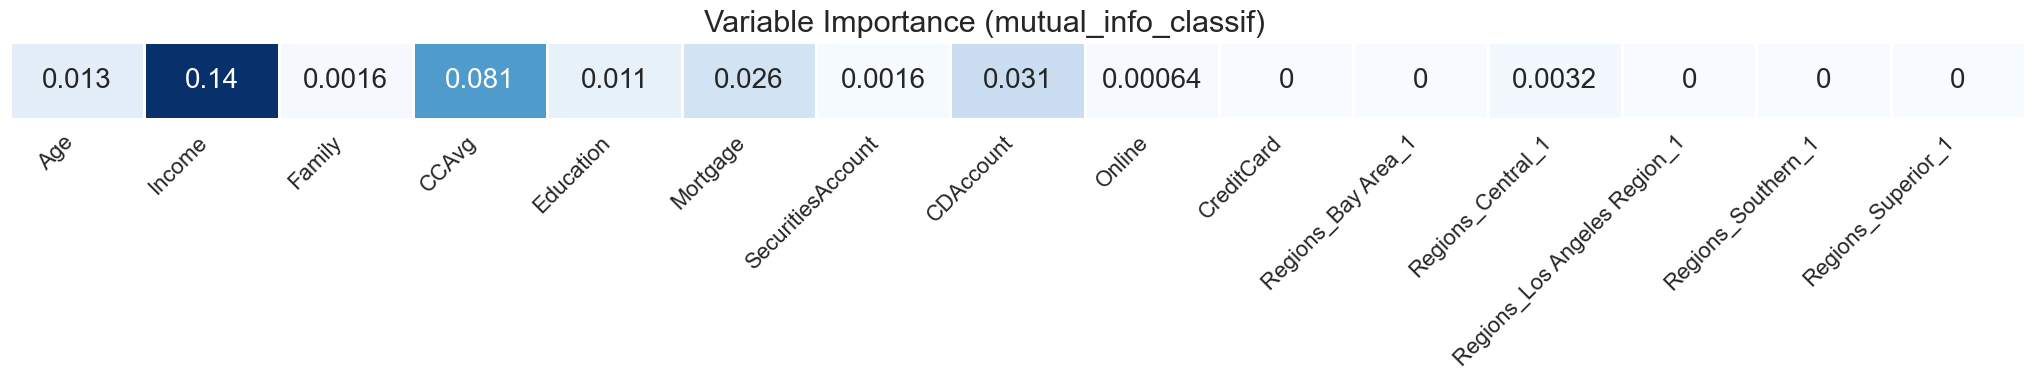

In [53]:
from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X_train, y_train, n_neighbors=5, copy = True)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True, annot_kws={"size": 20})
plt.yticks([], [])
plt.gca().set_xticklabels(X_train.columns, rotation=45, ha='right', fontsize=16)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=22, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

DECISION TREE

In [54]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    ytrain_predict = model.predict(X_train)
    ytest_predict = model.predict(X_test)
    # accuracy on training set
    print("\x1b[0;30;47m \033[1mAccuracy : Train :\033[0m", 
          model.score(X_train,y_train),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          model.score(X_test,y_test))
# accuracy on training set
    print("\x1b[0;30;47m \033[1mRecall   : Train :\033[0m", 
          metrics.recall_score(y_train,ytrain_predict),
          "\x1b[0;30;47m \033[1mTest:\033[0m", 
          metrics.recall_score(y_test,ytest_predict))
     

In [55]:
#since data is imbalanced adding weights
model = DecisionTreeClassifier(criterion = 'gini',class_weight={0:0.15,1:0.85}, random_state=1)
model.fit(X_train, y_train)
get_recall_score(model)

 Accuracy : Train : 1.0  Test: 0.988
 Recall   : Train : 1.0  Test: 0.9097222222222222


In [56]:
#Visualizing the Decision Tree¶
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'SecuritiesAccount', 'CDAccount', 'Online', 'CreditCard', 'Regions_Bay Area_1', 'Regions_Central_1', 'Regions_Los Angeles Region_1', 'Regions_Southern_1', 'Regions_Superior_1']


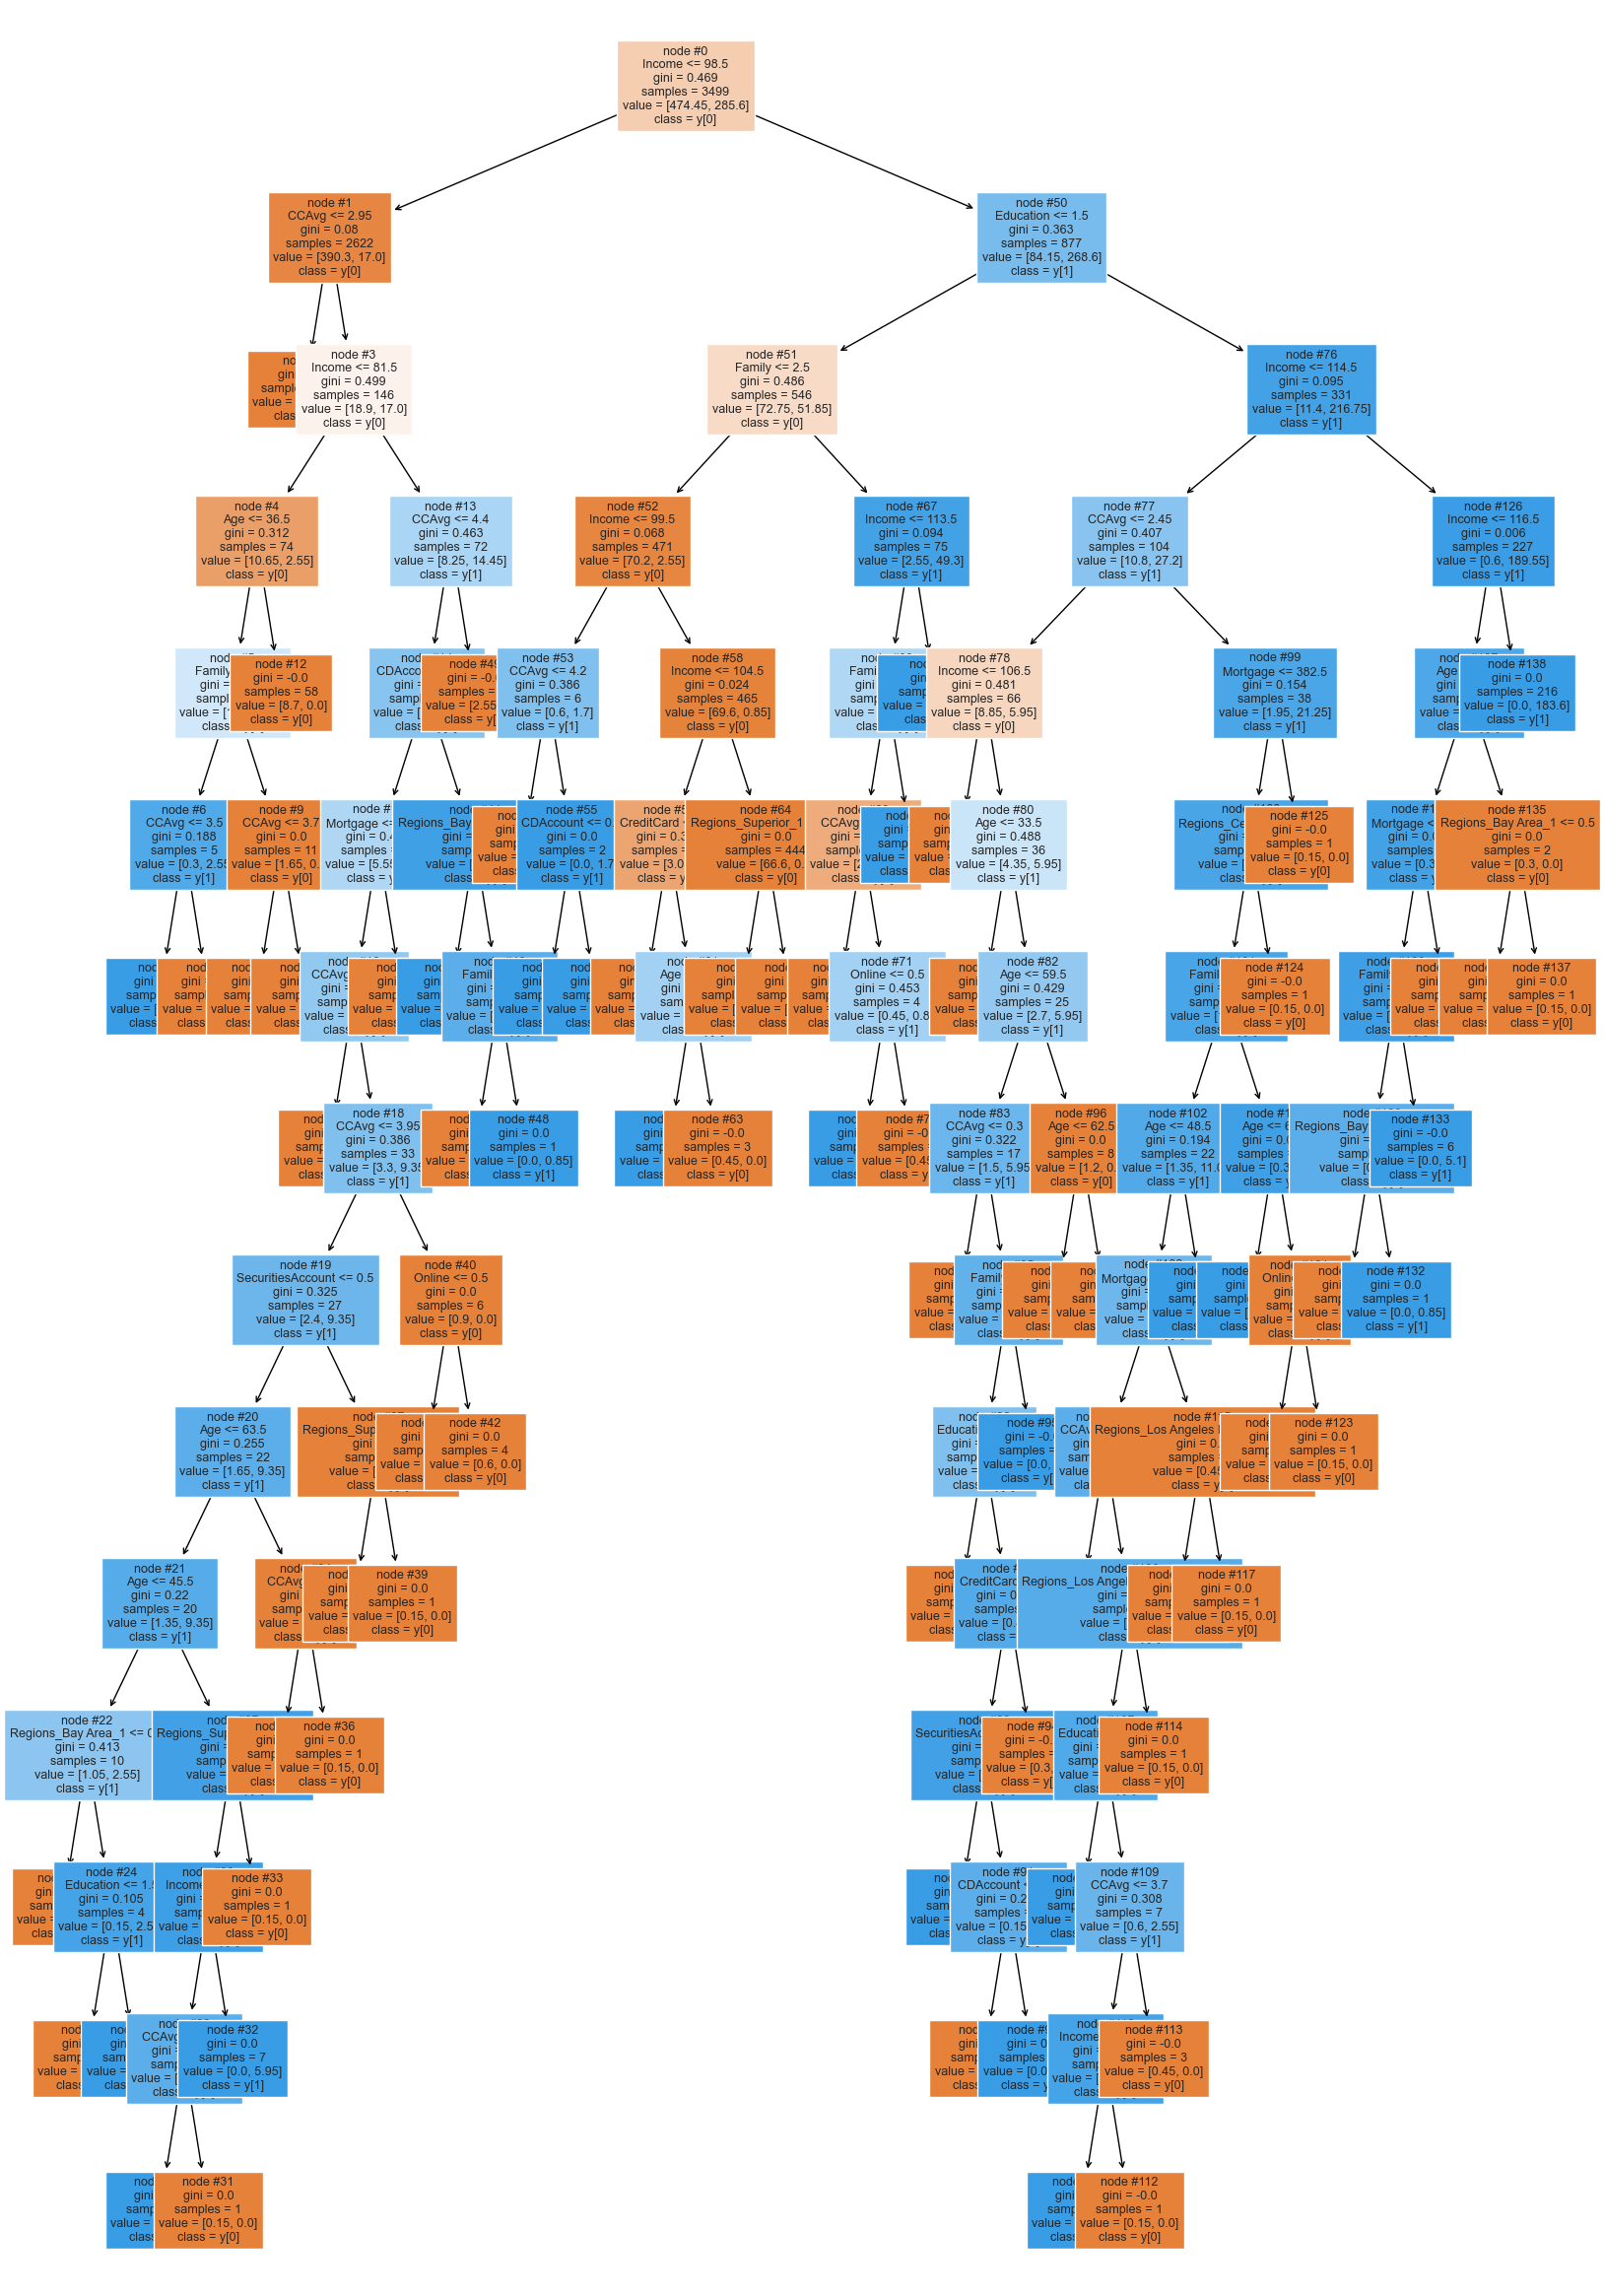

In [57]:
plt.figure(figsize=(20,30))
from sklearn import tree
from sklearn.model_selection import GridSearchCV
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [58]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [371.40, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |--- CCAvg <= 3.50
|   |   |   |   |   |   |--- weights: [0.00, 2.55] class: 1
|   |   |   |   |   |--- CCAvg >  3.50
|   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |--- Family >  3.50
|   |   |   |   |   |--- CCAvg <= 3.70
|   |   |   |   |   |   |--- weights: [0.60, 0.00] class: 0
|   |   |   |   |   |--- CCAvg >  3.70
|   |   |   |   |   |   |--- weights: [1.05, 0.00] class: 0
|   |   |   |--- Age >  36.50
|   |   |   |   |--- weights: [8.70, 0.00] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- CCAvg <= 4.40
|   |   |   |   |--- CDAccount <= 0.50
|   |   |   |   |   |--- Mortgage <= 127.50
|   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |--- weights: [0.90, 0.00] class: 0
|   |   |   |   |   |   |---

In [59]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

NameError: name 'dt' is not defined

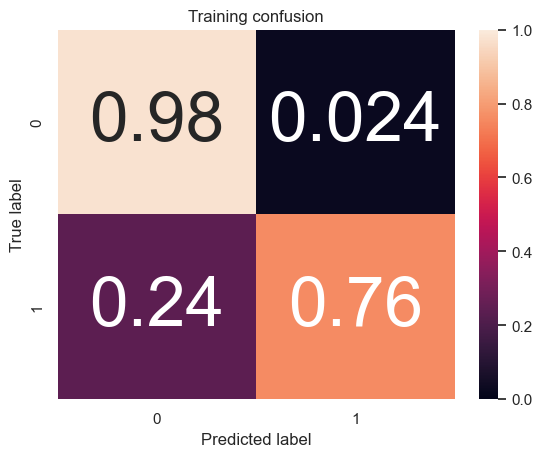

In [ ]:
 ytrain_predict = dt.predict(X_train)
   
# Plotting Confusion Matrix
cm = confusion_matrix(y_train, ytrain_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [ ]:
ytrain_predict = dt.predict(X_train)
ytrain_predict
confusion_matrix(y_train, ytrain_predict)

array([[3087,   76],
       [  81,  255]], dtype=int64)

In [ ]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

The True Positive rate / Recall per class is:  [0.97597218 0.75892857]
The Precision per class is:  [0.97443182 0.77039275]
The False Alarm rate per class is:  [0.24107143 0.02402782]
The Miss Rate rate per class is:  [0.02402782 0.24107143]
The Classification error of each class is [0.04486996 0.04486996]
The Accuracy of each class is [0.95513004 0.95513004]

The average Recall is:  0.8674503748701503
The average Precision is:  0.8724122837132656
The average False Alarm is:  0.1325496251298496
The average Miss Rate rate is:  0.1325496251298496
The average Classification error is 0.04486996284652758
The average Accuracy is 0.9551300371534724


RANDOM FOREST

In [ ]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)


NameError: name 'RandomForestClassifier' is not defined

Classification accuracy on test set with max features = 1 and max_depth = None: 0.962
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.904
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.904
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.905
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.907
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.983
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.905
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.923
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.943
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.965
Classification accuracy on test set with max features = log2 and max_depth = None: 0.983
Classification accuracy on test set with max features = log2

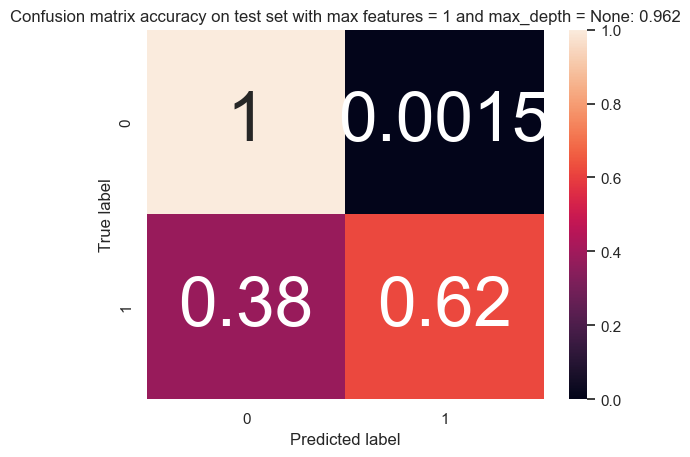

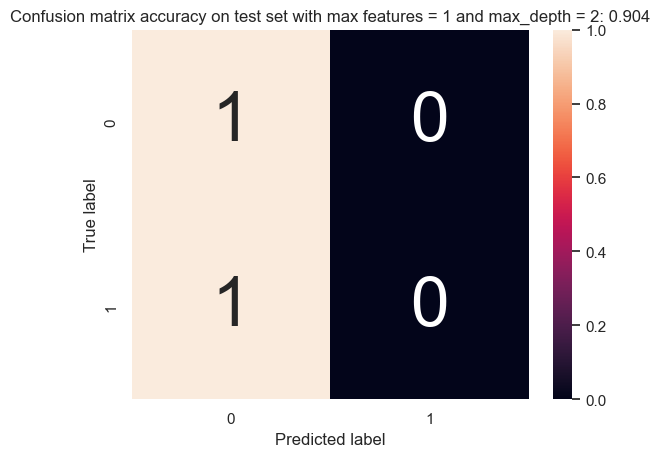

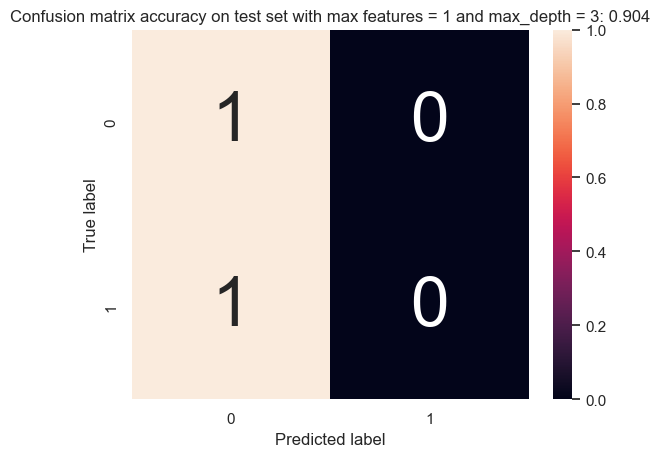

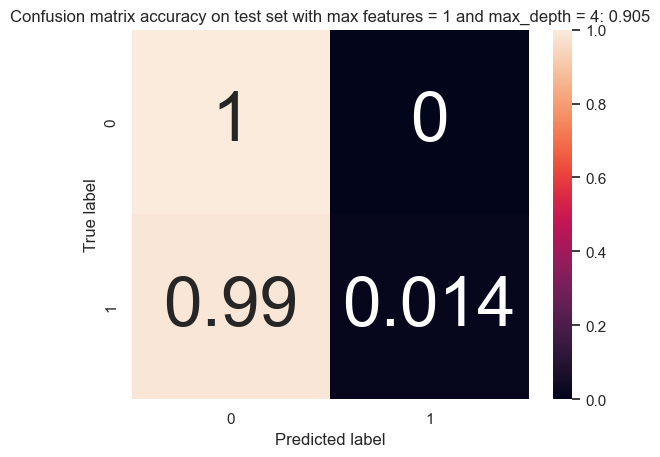

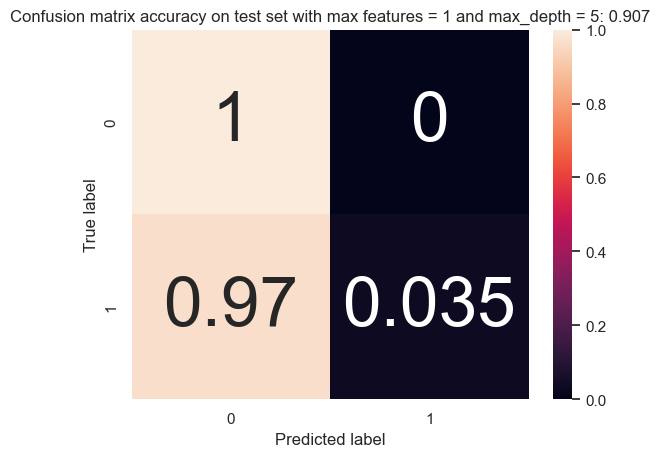

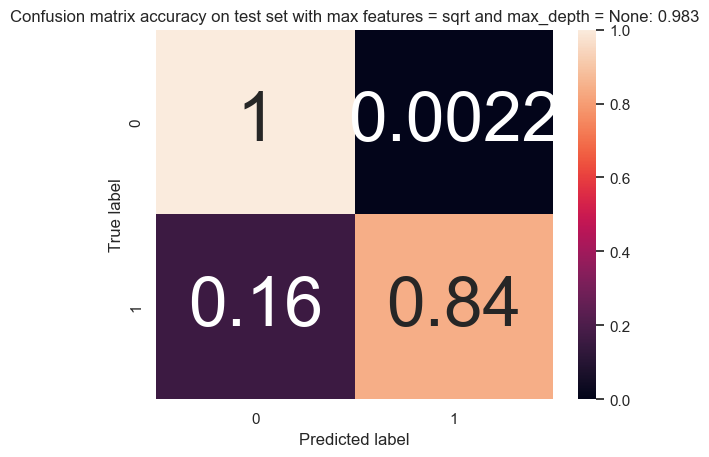

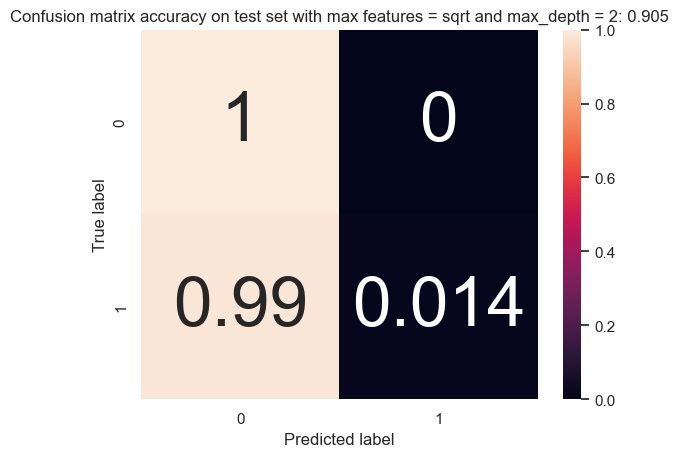

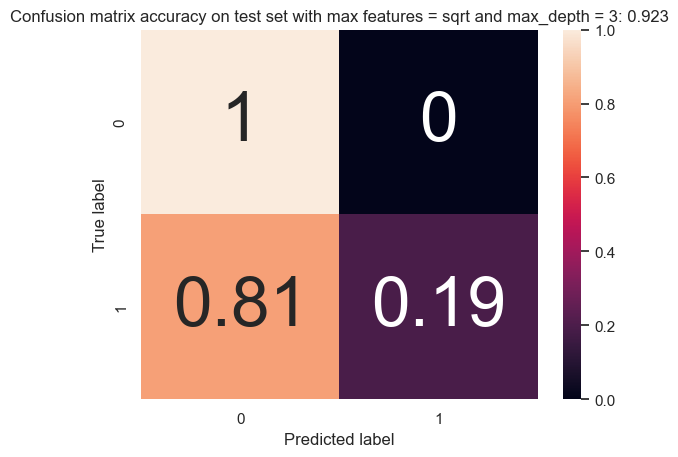

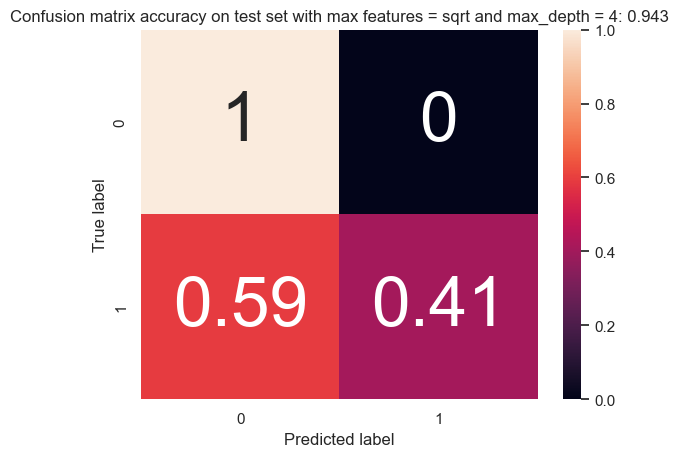

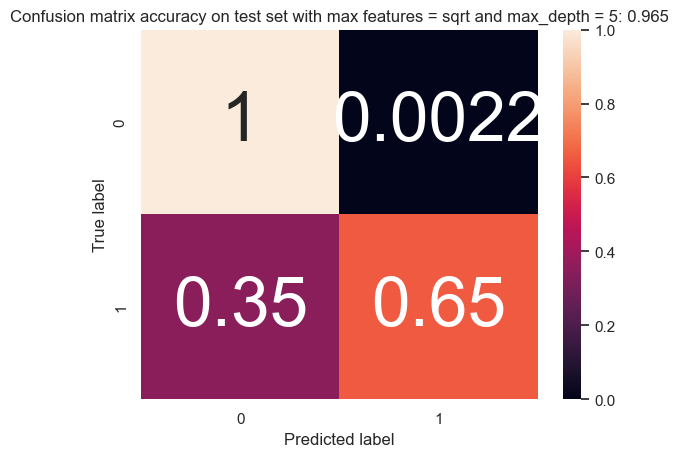

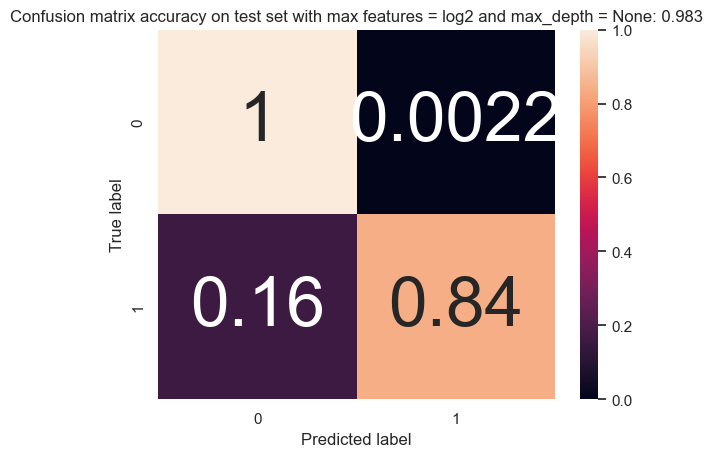

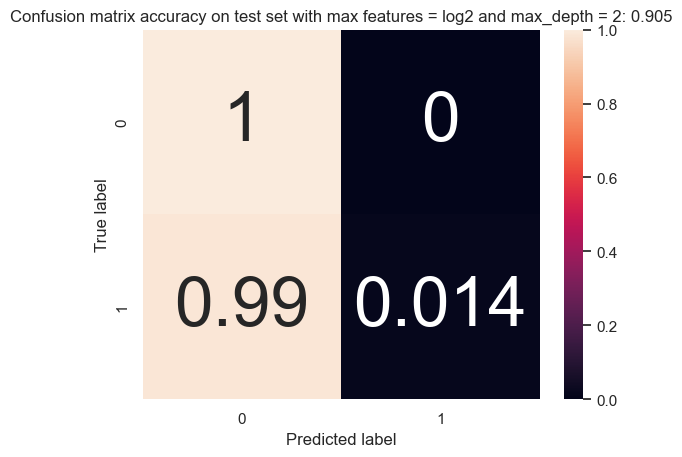

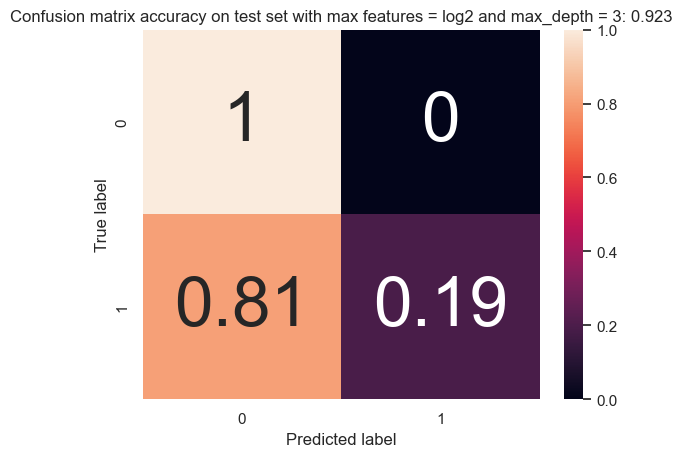

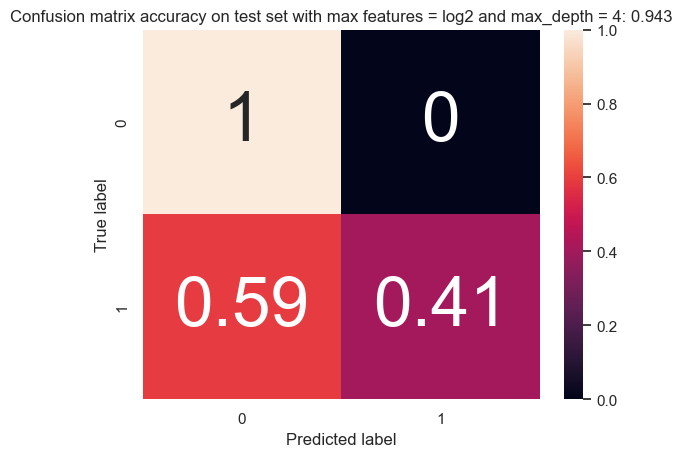

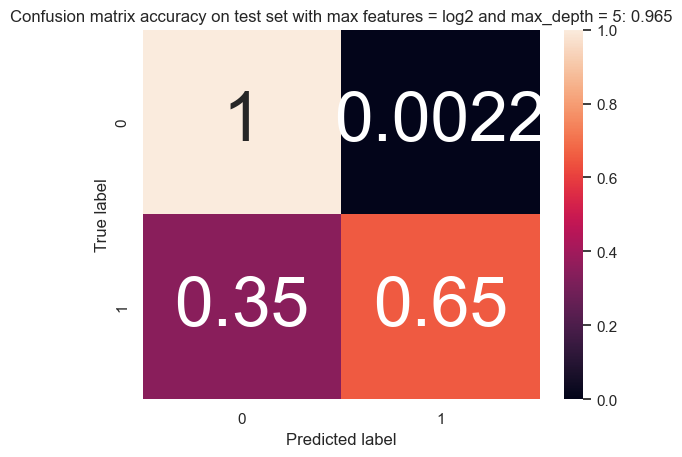

In [ ]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1356
           1       0.96      0.91      0.94       144

    accuracy                           0.99      1500
   macro avg       0.98      0.95      0.96      1500
weighted avg       0.99      0.99      0.99      1500



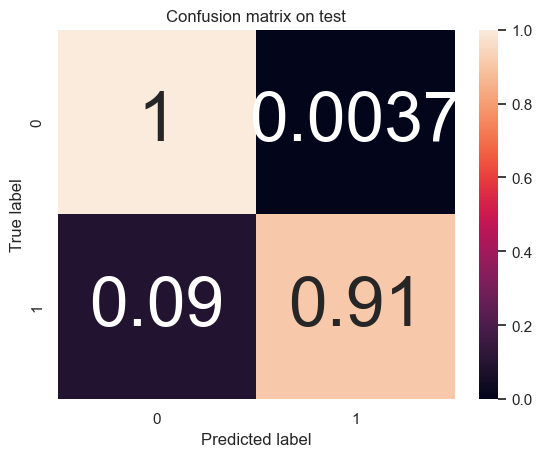

In [ ]:
ytrain_predict = model.predict(X_test)
print(classification_report(y_test, ytrain_predict))
cm = confusion_matrix(y_test, ytrain_predict)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Confusion matrix on test')



Observation

After Random forest,the false negative has reduced to 0.09.The accuracy on test data is 95% & Recall is 95%.